In [1]:
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd
import pandas as pd

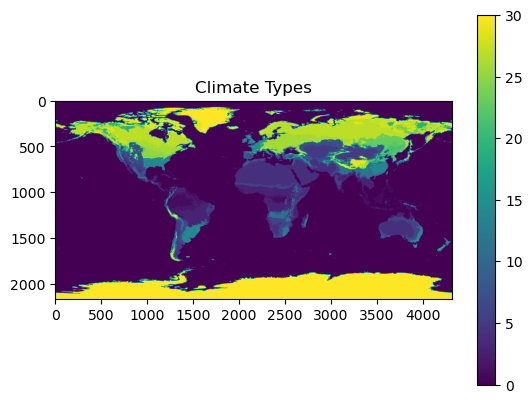

In [2]:
# Open the raster file
file_path = 'data/input/climate_types/Beck_KG_V1_present_0p083.tif'
raster = rasterio.open(file_path)

# Read the raster data
data = raster.read(1)

# Plot the map
plt.imshow(data, cmap='viridis')
plt.colorbar()
plt.title('Climate Types')
plt.show()


In [8]:
# Read the shapefile
shapefile_path = 'data/input/shapefiles/shapefile_cb_zcta_2015/shapefile.shp'
shapefile = gpd.read_file(shapefile_path)
shapefile.ZCTA5CE10 = shapefile.ZCTA5CE10.astype(int)
shapefile.rename(columns={'ZCTA5CE10': 'ZCTA5'}, inplace=True)

# Read the aggregated climate types file
climate_types_path = 'data/output/climate_types_raster2polygon/climate_types_cb_zcta_2015.csv'
climate_types_df = pd.read_csv(climate_types_path)
climate_types_df.rename(columns={'id': 'ZCTA5'}, inplace=True)

# Merge the shapefile and CSV based on a common column
merged_data = shapefile.merge(climate_types_df, on='ZCTA5')

/Users/mia694/miniforge3/envs/climate_types_zip_zcta/lib/python3.10/site-packages/geopandas/plotting.py:715: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/mia694/miniforge3/envs/climate_types_zip_zcta/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

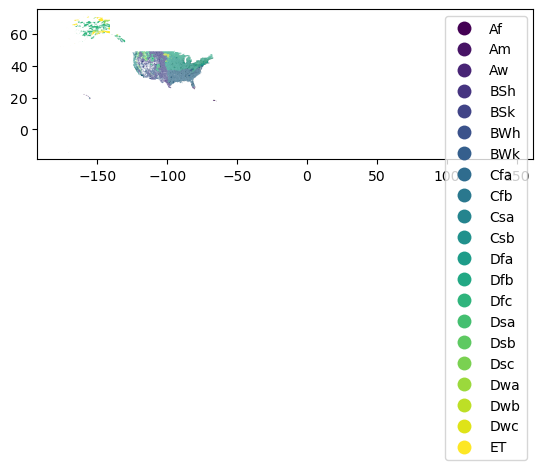

In [9]:
# Plot the merged data
merged_data.plot(column='climate_type_short', cmap='viridis', legend=True)